In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [5]:
yes=os.listdir('C:\\Users\\venka\\Desktop\\Python\\BrainTumorDetection\\165566_377107_bundle_archive\\yes')
no=os.listdir('C:\\Users\\venka\\Desktop\\Python\\BrainTumorDetection\\165566_377107_bundle_archive\\no')

In [6]:
data=np.concatenate([yes,no])

In [18]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])

In [9]:
import cv2

In [11]:
X_data =[]
for file in yes:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('C:\\Users\\venka\\Desktop\\Python\\BrainTumorDetection\\165566_377107_bundle_archive\\yes\\'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)


In [12]:
for file in no:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('C:\\Users\\venka\\Desktop\\Python\\BrainTumorDetection\\165566_377107_bundle_archive\\no\\'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)


In [13]:
X = np.squeeze(X_data)

In [15]:
X.shape

(253, 32, 32, 3)

In [16]:
# normalize data
X = X.astype('float32')
X /= 255

In [96]:
(x_train, y_train), (x_test, y_test) = (X[:201],data_target[:201]) , (X[201:] , data_target[201:])
(x_valid , y_valid) = (x_test[:52], y_test[:52])

In [21]:
len(x_train)

201

In [22]:
len(y_train)

201

In [23]:
len(x_test)

52

In [24]:
len(y_test)

52

In [33]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [142]:
model= Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(32, 32 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='sigmoid'),
    Dense(1)
])

In [143]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 4, 4, 64)        

In [145]:
model.fit(x_train,
         y_train,
         batch_size=200,
         epochs=300,
         validation_data=(x_test, y_test),)

Epoch 1/300
2/2 [==============================] - 0s 51ms/step - loss: 0.5436 - accuracy: 0.7711 - val_loss: 1.6197 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 [==============================] - 0s 18ms/step - loss: 0.5349 - accuracy: 0.7711 - val_loss: 1.9986 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 17ms/step - loss: 0.5669 - accuracy: 0.7711 - val_loss: 2.2910 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 18ms/step - loss: 0.6137 - accuracy: 0.7711 - val_loss: 2.3887 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 0s 16ms/step - loss: 0.6291 - accuracy: 0.7711 - val_loss: 2.3144 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 [==============================] - 0s 18ms/step - loss: 0.6119 - accuracy: 0.7711 - val_loss: 2.1971 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 [==============================] - 0s 17ms/step - loss: 0.5875 - accuracy: 0.7711 - val_loss: 1.8859 - val_accuracy: 0.0

2/2 [==============================] - 0s 17ms/step - loss: 0.4627 - accuracy: 0.8408 - val_loss: 1.4683 - val_accuracy: 0.5192
Epoch 59/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4339 - accuracy: 0.8607 - val_loss: 1.6841 - val_accuracy: 0.4231
Epoch 60/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4268 - accuracy: 0.8507 - val_loss: 1.4740 - val_accuracy: 0.4038
Epoch 61/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4051 - accuracy: 0.8557 - val_loss: 1.1429 - val_accuracy: 0.4808
Epoch 62/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3878 - accuracy: 0.8557 - val_loss: 1.0013 - val_accuracy: 0.5000
Epoch 63/300
2/2 [==============================] - 0s 18ms/step - loss: 0.4090 - accuracy: 0.8408 - val_loss: 0.9573 - val_accuracy: 0.5000
Epoch 64/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4180 - accuracy: 0.8557 - val_loss: 0.9696 - val_accuracy: 0.5000
Epoch 65/300
2/2 [========

Epoch 116/300
2/2 [==============================] - 0s 17ms/step - loss: 0.4647 - accuracy: 0.8358 - val_loss: 0.9320 - val_accuracy: 0.4808
Epoch 117/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4802 - accuracy: 0.8607 - val_loss: 0.7304 - val_accuracy: 0.6154
Epoch 118/300
2/2 [==============================] - 0s 17ms/step - loss: 0.5115 - accuracy: 0.7313 - val_loss: 0.5647 - val_accuracy: 0.9423
Epoch 119/300
2/2 [==============================] - 0s 18ms/step - loss: 0.5733 - accuracy: 0.4129 - val_loss: 0.5354 - val_accuracy: 0.8846
Epoch 120/300
2/2 [==============================] - 0s 18ms/step - loss: 0.5610 - accuracy: 0.5572 - val_loss: 0.6295 - val_accuracy: 0.6538
Epoch 121/300
2/2 [==============================] - 0s 17ms/step - loss: 0.4960 - accuracy: 0.7413 - val_loss: 0.7896 - val_accuracy: 0.5577
Epoch 122/300
2/2 [==============================] - 0s 17ms/step - loss: 0.4392 - accuracy: 0.8358 - val_loss: 1.0051 - val_accuracy: 0.5000
Epoch 

Epoch 174/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3990 - accuracy: 0.8010 - val_loss: 0.6700 - val_accuracy: 0.6923
Epoch 175/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3785 - accuracy: 0.8109 - val_loss: 0.8510 - val_accuracy: 0.5962
Epoch 176/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3355 - accuracy: 0.8507 - val_loss: 1.1931 - val_accuracy: 0.5000
Epoch 177/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3180 - accuracy: 0.8856 - val_loss: 1.5938 - val_accuracy: 0.3462
Epoch 178/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3422 - accuracy: 0.8806 - val_loss: 1.9944 - val_accuracy: 0.2885
Epoch 179/300
2/2 [==============================] - 0s 20ms/step - loss: 0.4273 - accuracy: 0.8458 - val_loss: 2.2914 - val_accuracy: 0.2115
Epoch 180/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4601 - accuracy: 0.8308 - val_loss: 2.3335 - val_accuracy: 0.2115
Epoch 

Epoch 232/300
2/2 [==============================] - 0s 17ms/step - loss: 0.4254 - accuracy: 0.6915 - val_loss: 0.7897 - val_accuracy: 0.7500
Epoch 233/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3755 - accuracy: 0.7662 - val_loss: 1.0154 - val_accuracy: 0.6154
Epoch 234/300
2/2 [==============================] - 0s 19ms/step - loss: 0.3330 - accuracy: 0.8806 - val_loss: 1.3062 - val_accuracy: 0.5577
Epoch 235/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3151 - accuracy: 0.9005 - val_loss: 1.6149 - val_accuracy: 0.3654
Epoch 236/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3554 - accuracy: 0.8756 - val_loss: 1.7351 - val_accuracy: 0.4231
Epoch 237/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3555 - accuracy: 0.8856 - val_loss: 1.6484 - val_accuracy: 0.5577
Epoch 238/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3624 - accuracy: 0.8756 - val_loss: 1.5545 - val_accuracy: 0.5962
Epoch 

Epoch 290/300
2/2 [==============================] - 0s 30ms/step - loss: 0.2652 - accuracy: 0.8458 - val_loss: 0.5821 - val_accuracy: 0.7500
Epoch 291/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3333 - accuracy: 0.8358 - val_loss: 0.6320 - val_accuracy: 0.7115
Epoch 292/300
2/2 [==============================] - 0s 22ms/step - loss: 0.2782 - accuracy: 0.8607 - val_loss: 0.7402 - val_accuracy: 0.6346
Epoch 293/300
2/2 [==============================] - 0s 19ms/step - loss: 0.2472 - accuracy: 0.9104 - val_loss: 0.8705 - val_accuracy: 0.5962
Epoch 294/300
2/2 [==============================] - 0s 16ms/step - loss: 0.2493 - accuracy: 0.9104 - val_loss: 1.0141 - val_accuracy: 0.5192
Epoch 295/300
2/2 [==============================] - 0s 17ms/step - loss: 0.2629 - accuracy: 0.9055 - val_loss: 1.1586 - val_accuracy: 0.4231
Epoch 296/300
2/2 [==============================] - 0s 22ms/step - loss: 0.2621 - accuracy: 0.9154 - val_loss: 1.2940 - val_accuracy: 0.3846
Epoch 

In [146]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5769230723381042


In [147]:
output=model.predict(x_test)

In [148]:
output

array([[ 1.1022103 ],
       [-0.09401017],
       [ 2.1916225 ],
       [ 3.6058526 ],
       [ 2.558083  ],
       [ 0.09688232],
       [ 2.5521846 ],
       [ 2.5485241 ],
       [ 1.7580851 ],
       [ 2.904599  ],
       [ 2.4107196 ],
       [-0.9889209 ],
       [-0.96789664],
       [ 2.6709762 ],
       [-0.25764537],
       [ 1.7823166 ],
       [ 2.8018193 ],
       [-2.6020265 ],
       [-4.8982944 ],
       [-0.3868283 ],
       [-4.2791104 ],
       [-1.1714917 ],
       [-0.25764537],
       [-0.5258121 ],
       [ 2.91864   ],
       [-5.324314  ],
       [-8.657405  ],
       [-2.9905398 ],
       [-9.68262   ],
       [-5.096045  ],
       [ 1.0196521 ],
       [ 2.6828725 ],
       [-2.217283  ],
       [-2.8620293 ],
       [ 3.2887914 ],
       [ 2.0438936 ],
       [-3.9402068 ],
       [-4.398445  ],
       [ 3.1511822 ],
       [-2.6646488 ],
       [-5.324314  ],
       [ 2.2729356 ],
       [-3.0164611 ],
       [-4.5609574 ],
       [-0.7661788 ],
       [ 0

In [149]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]


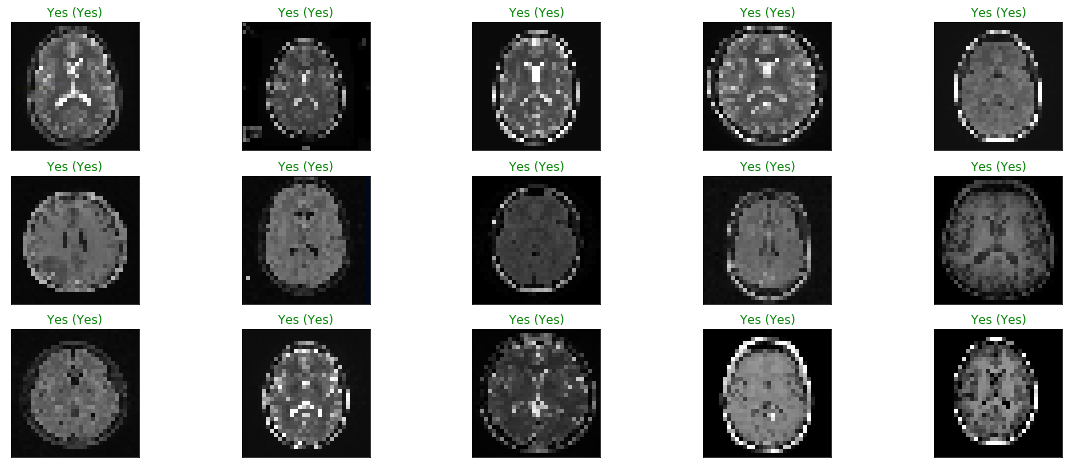

In [150]:

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(output[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()